<a href="https://colab.research.google.com/github/Neoneto/Coding_Dojo_Week8/blob/main/Belt_Exam_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Coding Dojo Belt Exam 2
## Stack 2 - Machine Learning
Submitted by Kenneth Alaba

## Import Libraries

In [118]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix,roc_auc_score, plot_roc_curve

# Loading the dataset

In [2]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

# open file
filename = '/content/drive/My Drive/Coding Dojo/Belt Exam 2/Belt2_A_drugtype_v2_final.csv'
df0 = pd.read_csv(filename,)
df0.head()

Mounted at /content/drive


,Age,Gender,BP,Cholesterol,Na_to_K,Drug
0,59.0,M,High,HIGH,13.935,drugQ
1,40.0,F,Normal,HIGH,10.103,drugZ
2,NaN,M,Normal,HIGH,9.084,drugZ
3,62.0,M,Normal,HIGH,16.594,drugZ
4,55.0,F,High,NORMAL,10.977,drugQ


In [3]:
# Show the dataframe info
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          237 non-null    float64
 1   Gender       296 non-null    object 
 2   BP           221 non-null    object 
 3   Cholesterol  296 non-null    object 
 4   Na_to_K      296 non-null    object 
 5   Drug         296 non-null    object 
dtypes: float64(1), object(5)
memory usage: 14.0+ KB


# Fixing Inconsistencies
Since I will be imputing missing values based on the entries in the other rows, I want to clean the data first more specifically, fixing inconsistencies.

In [4]:
# Copy the dataframe
# Apply changes to the copy and keep the original
df = df0.copy()

In [5]:
# Print unique values in each categorical column
for c_name in df.columns:
  if df[c_name].dtypes == 'object':
    print(c_name)
    print(df[c_name].unique())

Gender
['M' 'F' 'male' 'female' 'Female' 'Male' 'femal' 'Femal']
BP
['High' 'Normal' nan 'Low']
Cholesterol
['HIGH' 'NORMAL' 'NORM' 'norm' 'high']
Na_to_K
['13.935' '10.103' '9.084' '16.594' '10.977' '25.475' '9.17' '13.303'
 '11.009' '25.917' '18.295' '11.34' '28.632' '9.567' '7.49' '17.069'
 '15.478' '12.894' '8.011' '27.183' '9.281' '9.443' '17.225' '24.276'
 '8.37' '25.893' '9.664' '10.292' '19.011' '11.326' '13.967' '11.953'
 '13.091' '14.239' '34.686' '11.227' '18.043' '10.189' '11.198' '11.686'
 '20.489' '18.809' '30.366' '20.942' '11.262' '18.991' '15.015' '11.871'
 '13.769' '12.854' '25.969' '29.271' '7.285' '9.514' '9.709' '31.686'
 '12.856' '13.934' '15.516' '19.007' '12.495' '22.818' '16.725' '14.133'
 '17.211' '17.951' '19.128' '30.568' '22.905' '12.307' '28.294' '25.974'
 '38.247' '16.753' '22.456' '27.05' '13.938' '8.75' '13.972' '19.675'
 '32.922' '10.091' '16.275' '8.107' '10.443' '11.455' '16.347' '12.006'
 '6.683' '16.85' '16.31' '9.849' '9.475' '33.486' '8.968' '12.

By manual inspection, we can see that the columns Gender, Cholesterol, and Na_to_K have inconsistencies which will be mentioned and addressed in the following cells.

## Gender column
For the gender column, some are encoded as single letters only while some are full word but inconsistent casing. to standardize, all gender values corresponding to Female will be replaced by the string 'Female' and Male with 'Male'.

In [6]:
# Create a dictionary
gender_dict = {'M': 'Male',
               'male': 'Male',
               'Male': 'Male',
               'F': 'Female',
               'female': 'Female',
               'Female': 'Female',
               'femal': 'Female',
               'Femal': 'Female'}

# Replace values according to the dictionary
df['Gender'].replace(gender_dict, inplace = True)

# Check the new column
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

## Cholesterol Column
Similar string inconsistencies with gender

In [7]:

# Check the new column
df['Gender'].unique()

# Create a dictionary
chol_dict = {'HIGH': 'High',
               'NORMAL': 'Normal',
               'NORM': 'Normal',
               'norm': 'Normal',
               'high': 'High'}

# Replace values according to the dictionary
df['Cholesterol'].replace(chol_dict, inplace = True)

# Check the new column
df['Cholesterol'].unique()

array(['High', 'Normal'], dtype=object)

## Na to K
One of the entries has an underscore(_) after the value causing all the entries to be treated as string. This is fixed and all entries are converted to float.

In [8]:
# Fix the inconsistent entry
df.Na_to_K.loc[df.Na_to_K == '10.403_'] = 10.403
#df.Na_to_K.replace({'10.403_': 10.403}, inplace = True)

# Convert all to float
df.Na_to_K = df.Na_to_K.astype('float')

# Check the column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          237 non-null    float64
 1   Gender       296 non-null    object 
 2   BP           221 non-null    object 
 3   Cholesterol  296 non-null    object 
 4   Na_to_K      296 non-null    float64
 5   Drug         296 non-null    object 
dtypes: float64(2), object(4)
memory usage: 14.0+ KB


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


## Age column
This column has no inconsistency but according to the data dictionary, this column is supposed to have an 'int' datatype, however, this will be difficult to fix when there are missing values in the column. This can also be left as is since being an int or float doesn't have a significant consequence on the model.

In [9]:
# Convert the values to int
# df.Age = df.Age.astype('int')

# Initial Data Visualization
Get an initial visualization of the original data, before imputing but after fixing inconsistencies. This can also show suspicious numerical values.

drugZ    0.5
drugQ    0.5
Name: Drug, dtype: float64


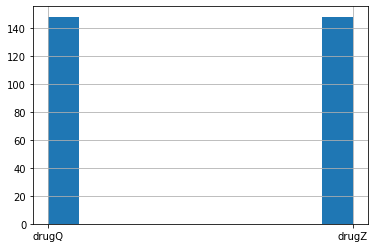

In [10]:
# Histogram of the Drug classes
print(df.Drug.value_counts(normalize = True))
df.Drug.hist()

This also shows that the dataset is balanced.

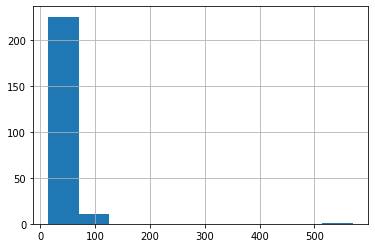

In [11]:
# Distribution of Age
df.Age.hist()

The gragh shows that there is an unusually high value of almost 500 in the Age column which is very unlikely. This is assumed to be a typographic error and is fixed accordingly. The occurence is only once and the value is 570 which is likely supposed to be 57.

In [12]:
# Show the highest age in the data
max_age = df0.Age.max() #search in the original data since the copied data is already altered
print(max_age)

df.loc[df.Age == max_age]


570.0


,Age,Gender,BP,Cholesterol,Na_to_K,Drug
232,570.0,Female,Normal,High,14.216,drugZ


In [13]:
# Replace the value
df.loc[df.Age == max_age, 'Age'] = 57

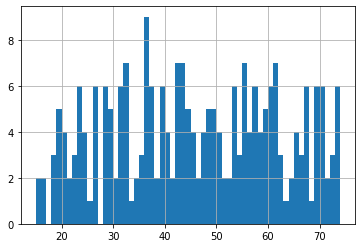

In [14]:
# Distribution of Age
df.Age.hist(bins = int( df.Age.max() - df.Age.min()))

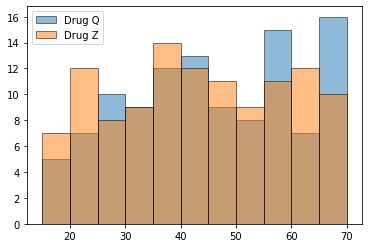

In [35]:
# Initialize the bins
bins = np.arange(min(df.Age), max(df.Age), 5)

# Create a histogram
plt.hist(df.loc[df.Drug == 'drugQ'].Age, bins = bins, alpha = 0.5, edgecolor = 'k', label = 'Drug Q')
plt.hist(df.loc[df.Drug != 'drugQ'].Age, bins = bins, alpha = 0.5, edgecolor = 'k', label = 'Drug Z')
plt.legend()

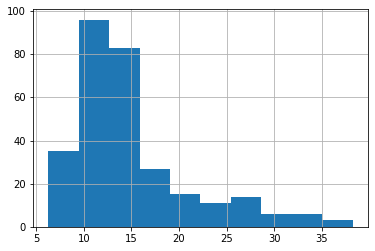

In [15]:
# Distribution of Na_to_K
df.Na_to_K.hist()

The distribution is left skewed (almost Gaussian)

# Filling mising values
To avoid leaking of data in filling missing value, this step will be done after the splitting of data for machine learning. For other steps before the splitting, such as EDA, these missing values will be ignored in the meantime.

In [16]:
# Count missing values
print(df.isna().sum())

# Show how many columns
print(f'Total number of rows: {len(df)}')

Age            59
Gender          0
BP             75
Cholesterol     0
Na_to_K         0
Drug            0
dtype: int64
Total number of rows: 296


From this, we can see that the number of missing values (for each column with mising values) is significant compared to the total number of columns (50/296 and 75/296). This may also imply that imputing these mising values with just a single value, like in Frequent Category Imputation, can greatly affect the distribution of the data shown above since one value will have an unusually high frequency.

# Exploratory Data Analysis / Visualization

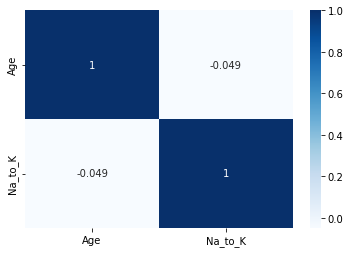

In [19]:
# Calculate the correlation coefficient
corr = df.corr()

# Create a heatmap
sns.heatmap(corr, annot = True, cmap = 'Blues')

Text(0, 0.5, 'Count')

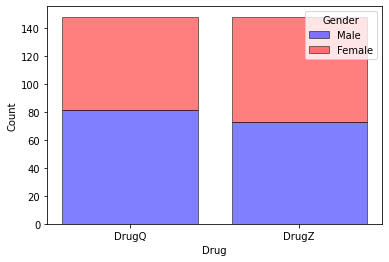

In [20]:
# Count the number of male and female in each Drug class
maleQ = len( df.loc[(df.Gender == 'Male') & (df.Drug == 'drugQ') ])
maleZ = len( df.loc[(df.Gender == 'Male') & (df.Drug == 'drugZ') ])
femaleQ = len( df.loc[(df.Gender == 'Female') & (df.Drug == 'drugQ') ])
femaleZ = len( df.loc[(df.Gender == 'Female') & (df.Drug == 'drugZ') ])

# Create a stacked bar graph
plt.bar(['DrugQ', 'DrugZ'], [maleQ, maleZ], color='b',alpha = 0.5,  edgecolor = 'k')
plt.bar(['DrugQ' , 'DrugZ'], [femaleQ, femaleZ], bottom = [maleQ, maleZ], color='r', alpha = 0.5, edgecolor = 'k')
plt.legend(title = 'Gender', labels = ['Male', 'Female'])
plt.xlabel('Drug')
plt.ylabel('Count')

From this graph, it shows that the data is balanced with approximately equal number of data points for each drug class. Additionally, the gender composition in each class is also approximately equal.

Text(0, 0.5, 'Count')

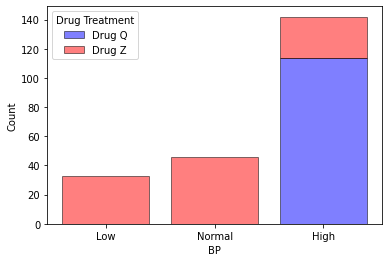

In [41]:
#Distribution of BP

# Count the number of drugQ and drugZ in each BP category
#drugQ
HighQ = len(df.loc[(df.Drug == 'drugQ') & (df.BP == 'High')])
NormalQ = len(df.loc[(df.Drug == 'drugQ') & (df.BP == 'Normal')])
LowQ = len(df.loc[(df.Drug == 'drugQ') & (df.BP == 'Low')])
#drugZ
HighZ = len(df.loc[(df.Drug != 'drugQ') & (df.BP == 'High')])
NormalZ = len(df.loc[(df.Drug != 'drugQ') & (df.BP == 'Normal')])
LowZ = len(df.loc[(df.Drug != 'drugQ') & (df.BP == 'Low')])

# Create a stacked bar graph
plt.bar(['Low', 'Normal', 'High'], [LowQ, NormalQ, HighQ], color='b',alpha = 0.5,  edgecolor = 'k')
plt.bar(['Low', 'Normal', 'High'], [LowZ, NormalZ, HighZ], bottom = [LowQ, NormalQ, HighQ], color='r', alpha = 0.5, edgecolor = 'k')
plt.legend(title = 'Drug Treatment', labels = ['Drug Q', 'Drug Z'])
plt.xlabel('BP')
plt.ylabel('Count')

From this graph, this shows us that Low and Normal BP all have a Drug Z treatment. Meanwhile, the modal class, High BP is composed of unequal number of Drugs Q and Z treatments with Drug Q being the higher. This also suggests that the best imputing method for missing values in the BP column would be the most frequent so that Drug Q patients with missing value for BP will fall in the High category. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


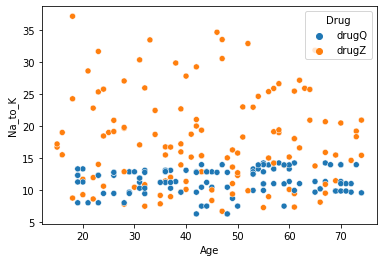

In [21]:
# Create a scatterplot
sns.scatterplot(df.Age, df. Na_to_K, hue = df.Drug)

From this scatterplot, we can see that drugQ is mostly associated with low values of Na_to_K regardless of the age. Meanwhile, drugZ is more scattered. If the task is to predict drugQ, logistic regression might be viable, however, the task is to predict both drug classes and this shows that logistic regression might not be suitable for this problem.

In [37]:
import plotly.express as px

fig = px.scatter_3d(df, x='Age', y='Cholesterol', z='Na_to_K',
              color='Drug')
fig.show()

Moreover, if we split the scatterplot based on the Cholesterol column, we can see that almost the similar trend can be observed for both high and normal cholesterol. \
These scatterplots also suggest that Age doesn't have a strong effect on the the Drug treatment and imputing the missing values on age with simple method won't be much of a problem and since age is numerical, the most suitable method is to impute with the mean.   

# Machine Learning
The task is to help doctors recommend the best type of drug treatment for at-risk patients. Create a machine learning model using the information about the patients found in this dataset to help advise the doctors’ treatment choice. Since the dataset contains the Drug treatment of each patient, this makes it a supervised classification problem. Moreover, since we want to identify the best treatment for a patient, not just which patient will fall into one of the classes, the metric that we should prioritize is the accuracy.

In [44]:
# Define the targets and features
X = df.drop(columns = ['Drug'])
y = df.Drug

In [57]:
# split to test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [49]:
# create a pipeline


## Column transformation

### Select categorical and numerical columns
num_selector = make_column_selector(dtype_include='number')
cat_selector = make_column_selector(dtype_include='object')

### Instantiate Transformers
mean_imputer = SimpleImputer(strategy='mean')
freq_imputer = SimpleImputer(strategy='most_frequent')
scaler = StandardScaler()
ohe_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

### Make Pipelines for each column type
num_pipe = make_pipeline(mean_imputer, scaler)
cat_pipe = make_pipeline(freq_imputer, ohe_encoder)

### Match pipe to column
num_tuple = (num_pipe, num_selector)
cat_tuple = (cat_pipe, cat_selector)

### Make column Transformer
column_transformer = make_column_transformer(num_tuple, cat_tuple)


# Pipeline adapted from http://learn.codingdojo.com/m/213/7153/67078

In this pipeline, one-hot encoding was used instead of ordinal encoding since it is easy to implement and the dataset is relatively small with only few categories, a small increase in the dimensionality won't be a problem to the model and the computation time.

## Default parameters Classification Model

### KNN

In [62]:
# Instantiate the pipeline with the model
temp_model = make_pipeline(column_transformer, KNeighborsClassifier())

# Train the model
temp_model.fit(X_train, y_train)

# Get the model accuracy
model_train = temp_model.score(X_train, y_train) 
model_test = temp_model.score(X_test, y_test)
    
# Show the results
print(f'Train Accuracy: {model_train:.3f}')
print(f'Test Accuracy: {model_test:.3f}')

Train Accuracy: 0.910
Test Accuracy: 0.865


### Decision Tree

In [64]:
# Instantiate the pipeline with the model
temp_model = make_pipeline(column_transformer, DecisionTreeClassifier())

# Train the model
temp_model.fit(X_train, y_train)

# Get the model accuracy
model_train = temp_model.score(X_train, y_train) 
model_test = temp_model.score(X_test, y_test)

# Show the results
print(f'Train Accuracy: {model_train:.3f}')
print(f'Test Accuracy: {model_test:.3f}')

Train Accuracy: 1.000
Test Accuracy: 0.973


### Bagged Trees 

In [65]:

# Instantiate the pipeline with the model
temp_model = make_pipeline(column_transformer, BaggingClassifier())

# Train the model
temp_model.fit(X_train, y_train)

# Get the model accuracy
model_train = temp_model.score(X_train, y_train) 
model_test = temp_model.score(X_test, y_test)

# Show the results
print(f'Train Accuracy: {model_train:.3f}')
print(f'Test Accuracy: {model_test:.3f}')

Train Accuracy: 0.986
Test Accuracy: 0.973


### Random Forest

In [66]:
# Instantiate the pipeline with the model
temp_model = make_pipeline(column_transformer, RandomForestClassifier())

# Train the model
temp_model.fit(X_train, y_train)

# Get the model accuracy
model_train = temp_model.score(X_train, y_train) 
model_test = temp_model.score(X_test, y_test)

# Show the results
print(f'Train Accuracy: {model_train:.3f}')
print(f'Test Accuracy: {model_test:.3f}')

Train Accuracy: 1.000
Test Accuracy: 0.946


### GBC

In [68]:
# Instantiate the pipeline with the model
temp_model = make_pipeline(column_transformer, GradientBoostingClassifier())

# Train the model
temp_model.fit(X_train, y_train)

# Get the model accuracy
model_train = temp_model.score(X_train, y_train) 
model_test = temp_model.score(X_test, y_test)

# Show the results
print(f'Train Accuracy: {model_train:.3f}')
print(f'Test Accuracy: {model_test:.3f}')

Train Accuracy: 1.000
Test Accuracy: 0.959


### LGBM

In [69]:
#import
from lightgbm import LGBMClassifier

# Instantiate the pipeline with the model
temp_model = make_pipeline(column_transformer, LGBMClassifier())

# Train the model
temp_model.fit(X_train, y_train)

# Get the model accuracy
model_train = temp_model.score(X_train, y_train) 
model_test = temp_model.score(X_test, y_test)

# Show the results
print(f'Train Accuracy: {model_train:.3f}')
print(f'Test Accuracy: {model_test:.3f}')

Train Accuracy: 0.982
Test Accuracy: 0.905


### XGBoost

In [70]:
# import
from xgboost import XGBClassifier

# Instantiate the pipeline with the model
temp_model = make_pipeline(column_transformer, XGBClassifier())

# Train the model
temp_model.fit(X_train, y_train)

# Get the model accuracy
model_train = temp_model.score(X_train, y_train) 
model_test = temp_model.score(X_test, y_test)

# Show the results
print(f'Train Accuracy: {model_train:.3f}')
print(f'Test Accuracy: {model_test:.3f}')

Train Accuracy: 0.982
Test Accuracy: 0.959


Of all the considered classification models, the Decision Tree Classifier has the highest accuracy score for both the train and test sets with scores of 1.0 and 0.973. Additionally, these values are pretty close which means that the model does not overfit. The next best model is Bagged Trees with almost the same scores of 0.986 and 0.973. These two models will be considered for hyperparameter tuning.

# Optimal Decision Tree

In [136]:
# Instantiate the model
dt = DecisionTreeClassifier()

# Instantiate the pipeline with the model
dt_pipe = make_pipeline(column_transformer, dt)

# Train the model
dt_pipe.fit(X_train, y_train)

# Show default parameters
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [129]:
# GridSearch
# Adapted from https://colab.research.google.com/drive/1OfZl5AkIbyNtY-F0p8FXqtOKOE9ry31r?usp=sharing#scrollTo=tSG-KcR8yGWu
# By Sir Marvin

# define the range of values per hyperparameter
min_samples_leaf_range = [1,5]
random_state_range = [0,42]
min_samples_split_range = [2,5]

best_score = 0
best_model = 0

# for each possible combination of hyperparameters
for min_samples_leaf in range(min_samples_leaf_range[0], min_samples_leaf_range[1] + 1, 1):
  for random_state in range(random_state_range[0], random_state_range[1] + 1, 1):
    for min_samples_split in range(min_samples_split_range[0], min_samples_split_range[1] + 1, 2):

      # initialize the model according to the hyperparameters given
      dt = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf, 
                                  min_samples_split=min_samples_split,
                                  random_state = random_state
                                  )
      
      # Instantiate pipeline
      dt_pipe = make_pipeline(column_transformer, dt)

      # train
      dt_pipe.fit(X_train, y_train)

      # check training performance
      train_score = dt_pipe.score(X_train, y_train)

      # check testing performance
      test_score = dt_pipe.score(X_test, y_test)

      # print(train_score.round(3), test_score.round(3))

      # if the current score is the best score, save
      if test_score > best_score:
        best_score = test_score
        best_model = dt_pipe


print(best_score, best_model.get_params())

0.9864864864864865 {'memory': None, 'steps': [('columntransformer', ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f9262965210>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compos

In [120]:
# Instantiate the model according to the best hyperparameters
dt = DecisionTreeClassifier(min_samples_leaf = 1, min_samples_split = 2, random_state = 0)

# Instantiate the pipeline with the model
dt_pipe = make_pipeline(column_transformer, dt)

# Train the model
dt_pipe.fit(X_train, y_train)

# Get the model accuracy
model_train = dt_pipe.score(X_train, y_train) 
model_test = dt_pipe.score(X_test, y_test)

# Create test predictions
dt_pipe_pred = dt_pipe.predict(X_test)

# Show the results
print(f'Train Accuracy: {model_train:.3f}')
print(f'Test Accuracy: {model_test:.3f}')

Train Accuracy: 1.000
Test Accuracy: 0.986


## Metrics

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



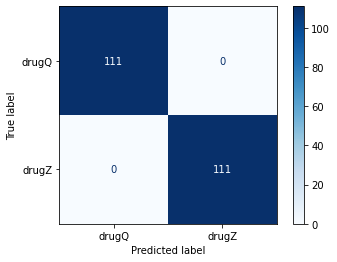

In [115]:
# Train confusion matrix
plot_confusion_matrix(dt_pipe, X_train, y_train, cmap = 'Blues');

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



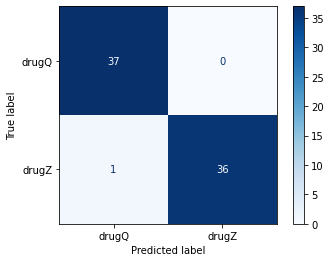

In [116]:
# Test confusion matrix
plot_confusion_matrix(dt_pipe, X_test, y_test, cmap = 'Blues');

In [125]:
# Calculate the confusion matrix
confusion_test = confusion_matrix(y_test, dt_pipe_pred)

TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

# Calculate the metrics
sensitivity = TP / float(TP+FN)
specificity = TN / float(TN+FP)

# Print the metrics
print(f'Test sensitivity = {sensitivity:.3f}')
print(f'Test specificity = {specificity:.3f}')

Test sensitivity = 0.973
Test specificity = 1.000


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.



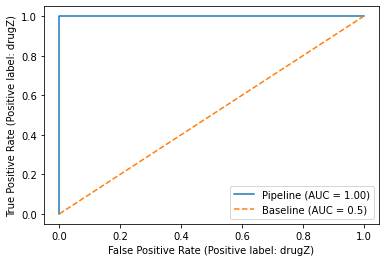

In [126]:
# visualize ROC curve for training
plot_roc_curve(dt_pipe, X_train, y_train)
plt.plot([0, 1], [0, 1], ls = '--', label = 'Baseline (AUC = 0.5)')
plt.legend();

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.



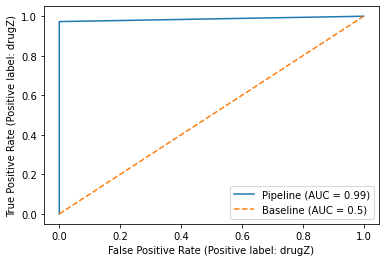

In [128]:
# visualize ROC curve for testing
plot_roc_curve(dt_pipe, X_test, y_test)
plt.plot([0, 1], [0, 1], ls = '--', label = 'Baseline (AUC = 0.5)')
plt.legend();

The optimized model got only one wrong prediction for the train and test set, combined. Additionally, the accuracy scores are very close which means that there is no overfitting.

# Optimal Bagged trees

In [135]:
# Instantiate the model
bg = BaggingClassifier()

# Instantiate the pipeline with the model
bg_pipe = make_pipeline(column_transformer, bg)

# Train the model
bg_pipe.fit(X_train, y_train)

# Show default parameters
bg.get_params()

{'base_estimator': None,
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [161]:
# GridSearch
# Adapted from https://colab.research.google.com/drive/1OfZl5AkIbyNtY-F0p8FXqtOKOE9ry31r?usp=sharing#scrollTo=tSG-KcR8yGWu
# By Sir Marvin

# define the range of values per hyperparameter
n_estimators_range = [10,100]


best_score = 0
best_model = 0

# for each possible combination of hyperparameters
      for n_estimators in range(n_estimators_range[0], n_estimators_range[1] + 1, 10):

        # initialize the model according to the hyperparameters given
        bg = BaggingClassifier(max_features = 1.0,
                                    random_state = 0,
                                    #max_samples = max_samples,
                                    n_estimators = n_estimators
                                    )
        
        # Instantiate pipeline
        bg_pipe = make_pipeline(column_transformer, bg)

        # train
        bg_pipe.fit(X_train, y_train)

        # check training performance
        train_score = bg_pipe.score(X_train, y_train)

        # check testing performance
        test_score = bg_pipe.score(X_test, y_test)

        # print(train_score.round(3), test_score.round(3))

        # if the current score is the best score, save
        if test_score > best_score:
          best_score = test_score
          best_model = bg_pipe


print(best_score, best_model.get_params())

0.9864864864864865 {'memory': None, 'steps': [('columntransformer', ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f9262965210>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compos

In [163]:
# Instantiate the model according to the best hyperparameters
bg = BaggingClassifier(n_estimators=10, random_state=0) 

# Instantiate the pipeline with the model
bg_pipe = make_pipeline(column_transformer, bg)

# Train the model
bg_pipe.fit(X_train, y_train)

# Get the model accuracy
model_train = bg_pipe.score(X_train, y_train) 
model_test = bg_pipe.score(X_test, y_test)

# Create test predictions
bg_pipe_pred = bg_pipe.predict(X_test)

# Show the results
print(f'Train Accuracy: {model_train:.3f}')
print(f'Test Accuracy: {model_test:.3f}')

Train Accuracy: 0.986
Test Accuracy: 0.986


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



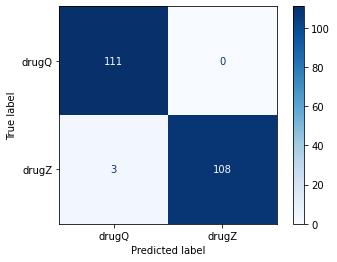

In [166]:
# Train confusion matrix
plot_confusion_matrix(bg_pipe, X_train, y_train, cmap = 'Blues');

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



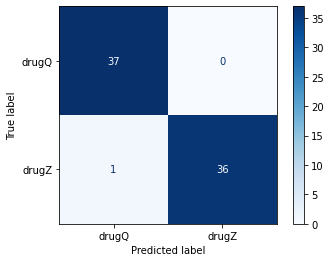

In [167]:
# Test confusion matrix
plot_confusion_matrix(bg_pipe, X_test, y_test, cmap = 'Blues');

In [168]:
# Calculate the confusion matrix
confusion_test = confusion_matrix(y_test, bg_pipe_pred)

TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

# Calculate the metrics
sensitivity = TP / float(TP+FN)
specificity = TN / float(TN+FP)

# Print the metrics
print(f'Test sensitivity = {sensitivity:.3f}')
print(f'Test specificity = {specificity:.3f}')

Test sensitivity = 0.973
Test specificity = 1.000


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.



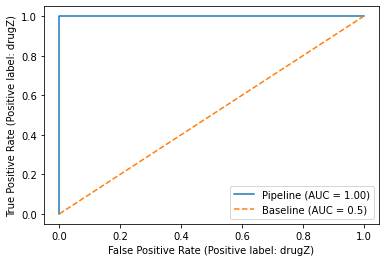

In [169]:
# visualize ROC curve for training
plot_roc_curve(bg_pipe, X_train, y_train)
plt.plot([0, 1], [0, 1], ls = '--', label = 'Baseline (AUC = 0.5)')
plt.legend();

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.



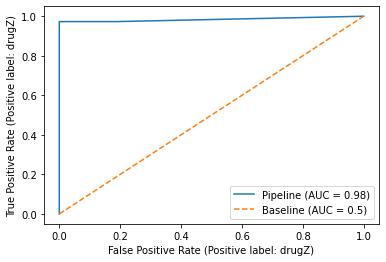

In [170]:
# visualize ROC curve for testing
plot_roc_curve(bg_pipe, X_test, y_test)
plt.plot([0, 1], [0, 1], ls = '--', label = 'Baseline (AUC = 0.5)')
plt.legend();

# Best Model

The best optimized model for this data is the Decision Tree Classifier with better score for all the metrics specially accuracy. Additionally, it also has an almost perfect prediction for the test set and a perfect prediction for the train set.